## The goal of this notebook is to do nothing but act as (piece-wise) starting point of other notebooks :) 

In [4]:
import pandas as pd
import sys
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import torch
# import tensorflow # Need to update for this. Later!
print("pandas version:", pd.__version__)
print("Python version:", sys.version)
print("matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)
print("SciPy version:", sp.__version__)
print("IPython version:", IPython.__version__)
print("scikit-learn version:", sklearn.__version__)
print("PyTorch version:", torch.__version__)
#print("TensorFlow version:", tensorflow.__version__)

pandas version: 1.4.4
Python version: 3.9.13 (main, Oct 13 2022, 16:12:19) 
[Clang 12.0.0 ]
matplotlib version: 3.5.2
NumPy version: 1.24.2
SciPy version: 1.9.1
IPython version: 7.31.1
scikit-learn version: 1.1.1
PyTorch version: 2.1.0.dev20230316


## Basic kNN

In [5]:
from collections import Counter
import math
import numpy as np

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        #print (example, example[:-1], query, distance)
        # Pick first entry of example and compute distance
        # a[:-1] means leave last element of a.
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def main():
    '''
    # Regression Data
    # 
    # Column 0: height (inches)
    # Column 1: weight (pounds)
    '''
    reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
    ]
    
    # Question:
    # Given the data we have, what's the best-guess at someone's weight if they are 62 inches tall?
    reg_query = [62]
    reg_k_nearest_neighbors, reg_prediction = knn(
        reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )

    print(reg_prediction)
    
    '''
    # Classification Data
    # 
    # Column 0: age
    # Column 1: likes pineapple
    '''
    clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0],
    ]
    # Question:
    # Given the data we have, does a 19 year old like pineapples on their pizza?
    clf_query = [19]
    clf_k_nearest_neighbors, clf_prediction = knn(
        clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
    )
    print (clf_prediction)

if __name__ == '__main__':
    main()

128.24666666666667
1


## Linear regression from scratch

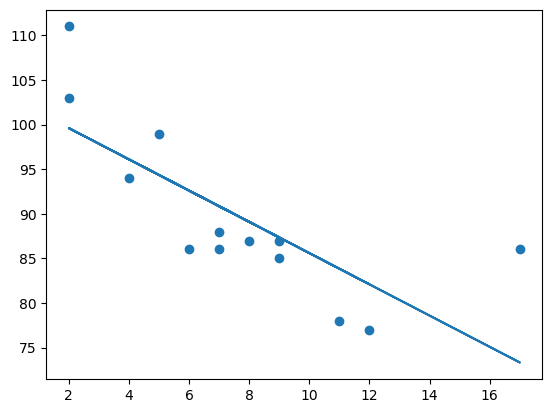

R^2 0.758591524376155
Speed of 10 yr-old car 85.59308314937454


In [6]:
'''
In this example, 
the x-axis represents age, 
and the y-axis represents speed. 
We have registered the age and speed of 13 cars 
as they were passing a tollbooth. 
Let us see if the data we collected could be used in a 
linear regression:
'''

import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

m, c, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return m*x + c # y = mx + c 

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print ("R^2", abs(r))

speed = myfunc(10)
print("Speed of 10 yr-old car", speed)

## Logistic from scratch 

LogisticRegression()
[0]


<AxesSubplot:>

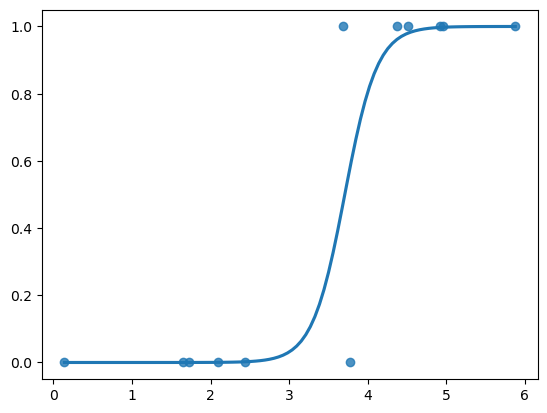

In [7]:
import numpy
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)
print(logr.fit(X,y))

# Predict if the tumor is cancerous where the size is given:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)
sns.regplot(x=X, y=y,logistic=True, ci=None)